In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

[*********************100%***********************]  6 of 6 completed


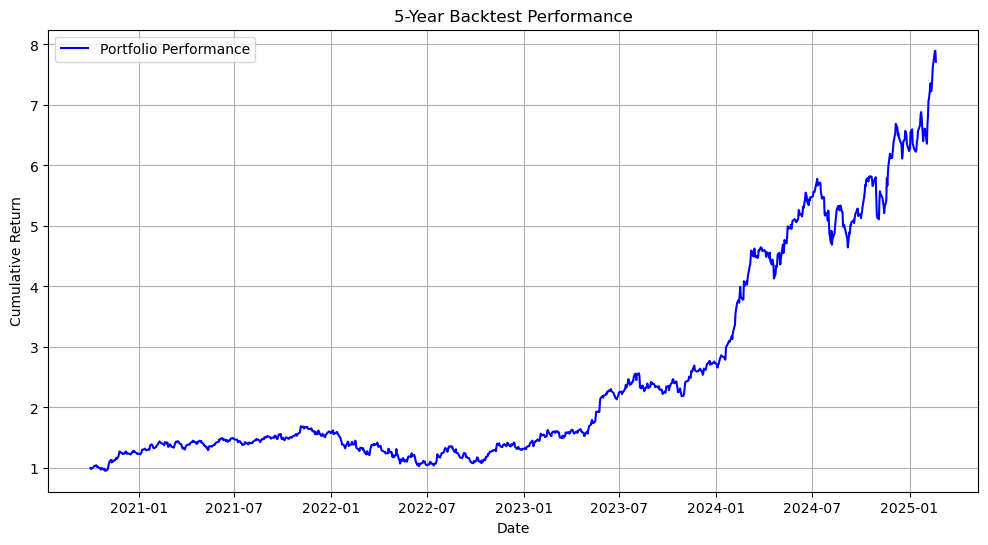

In [7]:
tickers = "NVDA, XLF, JPM, VITL, PLTR, SMCI"

def fetch_data(tickers, start_date, end_date):
    tickers_list = [ticker.strip() for ticker in tickers.split(",")]  # Convert string to list
    data = yf.download(tickers_list, start=start_date, end=end_date, auto_adjust=True)
    if data.empty:
        print("Error: No data retrieved. Check ticker symbols or API connection.")
        return None
    return data["Adj Close"] if "Adj Close" in data else data["Close"]
    
def backtest(data):
    if data is None:
        print("Error: No data available for backtesting.")
        return None
    returns = data.pct_change().dropna()
    if isinstance(returns, pd.Series):
        returns = returns.to_frame()
    
    cumulative_returns = (1 + returns.mean(axis=1)).cumprod()
    return cumulative_returns

def backtester():
    end_date = datetime.today().strftime('%Y-%m-%d')
    start_date = (datetime.today() - timedelta(days=5*365)).strftime('%Y-%m-%d')
    stock_data = fetch_data(tickers, start_date, end_date)

    if stock_data is None:
        print("No stock data retrieved. Exiting.")
        return
    cumulative_returns = backtest(stock_data)

    if cumulative_returns is None:
        print("Backtest failed. No data to plot.")
        return

    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_returns.index, cumulative_returns, label="Portfolio Performance", color='blue')
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.title("5-Year Backtest Performance")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    backtester()
